In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px


import matplotlib.pyplot as plt
import os

# Требования: 
- во всех графиках должны быть подписи чере title, legend, etc... 
- Убедитесь, что после сохранения ноутбука графики всё ещё видно, если открыть ноутбук заново, если не видно, то напишите мне @kirizhik 
- Можно баловаться с цветами, чтобы было **K P A C U B O**, но **не вырвеглазно**, пожалуйста

In [3]:
df = pd.read_csv('data.csv', index_col = 0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [15]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [12]:
df[['Wage']].head(10)

,Wage
0,€565K
1,€405K
2,€290K
3,€260K
4,€355K
5,€340K
6,€420K
7,€455K
8,€380K
9,€94K


# Заполните пропуски в утверждениях 

- В датасете [88] переменных

- Из них числовых [43]

# Изучите распределение возростов с помощью Age [px.histogram](https://plotly.com/python/histograms/), изучите [более продвинутые методы](https://plotly.com/python/distplot/) визуализации распределений 

In [48]:
# Ваш код красивый и самый лучший сюда
counts, bins = np.histogram(df['Age'], bins=range(16, 45, 1))

fig = px.bar(x=bins[:-1], y=counts, labels=dict(x='Возраст', y='Кол-во игроков'))

fig.show()

# Визуализируйте соотношенеие между левшами и правшами (? сами найдите необходимую колонку в данных, считаем, что левша-правша ~ предпочтительная нога для ударов )

In [120]:
# Ваш гениальный код сюда
px.histogram(df, x='Preferred Foot')

# Визуализируйте Международный Рейтинг футболистов (International Reputation), ассоциирован ли он с национальностью? футбольным клубом? 

![Игроки](Players.png "Title")


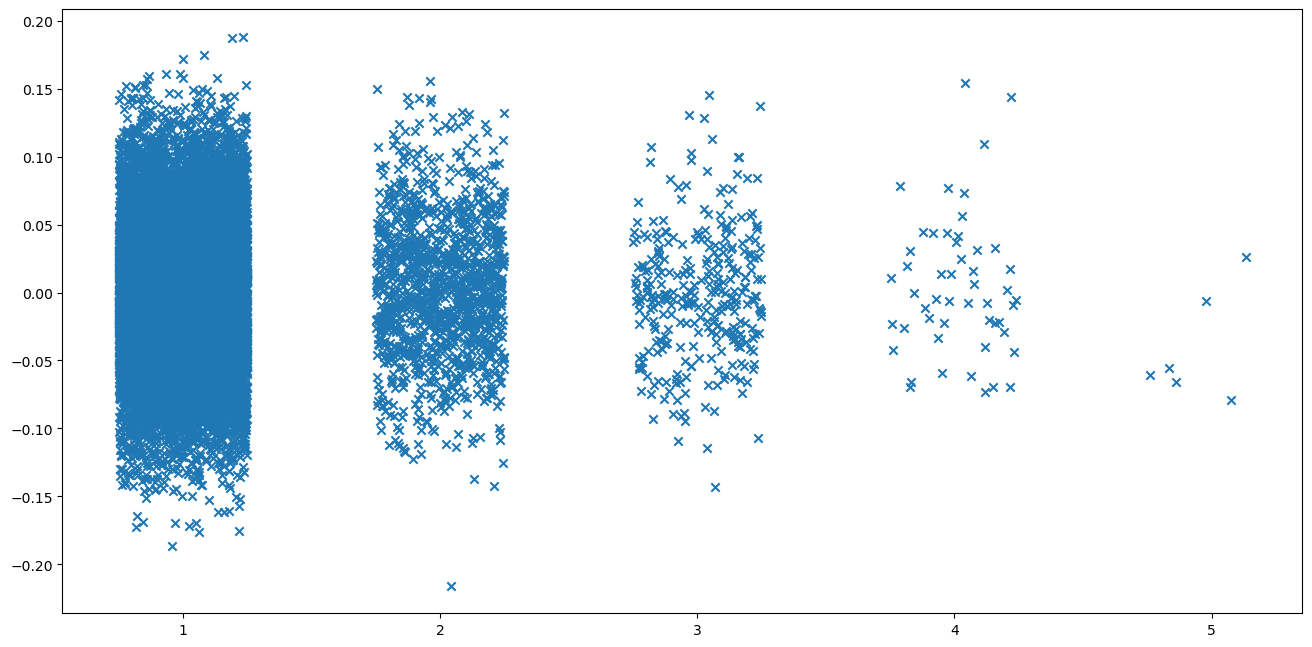

In [122]:
# ну сами понимаете...
# px.histogram(df., x='International Reputation')
plt.figure(figsize=(16, 8), dpi=100)
plt.scatter(x=df['International Reputation'] + 0.5 * np.random.rand(df.shape[0]) - 0.25, y=0.05 * np.random.randn(df.shape[0]) + np.zeros(df.shape[0]), marker='x')

In [125]:
px.scatter(x=df.groupby('Nationality')['International Reputation'].mean())

ValueError: All arguments should have the same length. The length of argument `y` is 18207, whereas the length of  previously-processed arguments ['x'] is 164

# Есть ли зависимость между потенциалом (Potential) и Международным Рейтингом футболистов (International Reputation)? Визуализируте её. Влияет ли на потенциал игровая нога? Почему так может случиться? (картинка в тему)

![Коазуация или корреляция?](causuation.png "???")

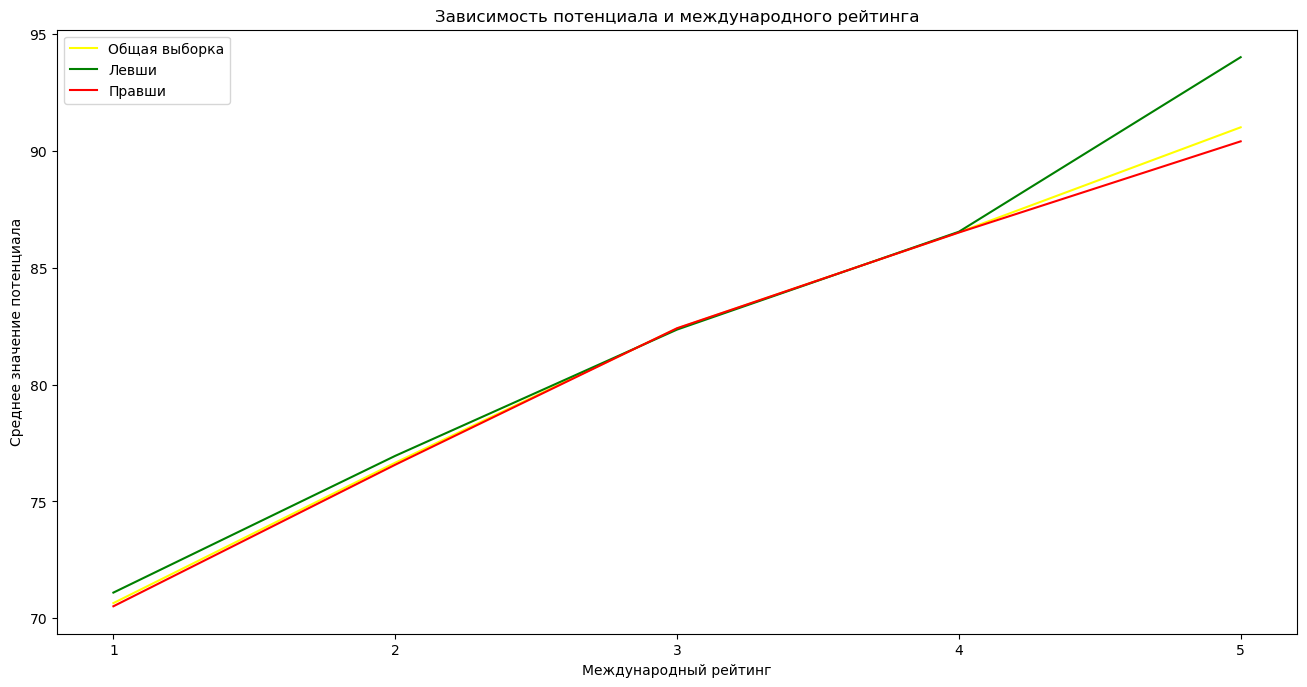

In [101]:
# 🤔 угадайте что
plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df.groupby('International Reputation')['Potential'].mean(), color='yellow')
plt.plot(df[df['Preferred Foot'] == 'Left'].groupby('International Reputation')['Potential'].mean(), color='green')
plt.plot(df[df['Preferred Foot'] == 'Right'].groupby('International Reputation')['Potential'].mean(), color='red')
plt.xticks([1, 2, 3, 4,5])

plt.title('Зависимость потенциала и международного рейтинга')
plt.legend(['Общая выборка', 'Левши', 'Правши'])
plt.ylabel('Среднее значение потенциала')
plt.xlabel('Международный рейтинг')

plt.show()

# Теперь пройдёмся по показателям игроков... 
### Есть ли зависимость Выносливости (Stamina) и Силы (Strength) игроков? какая? точно зависимость? 


# Зависит ли Стоимость игрока стоимость (Value) игрока от его "финтов" (Skill Moves)?

In [162]:
def get_correct_value(s):
    if s[-1] == 'K':
        return float(s[1:-1]) * 1e3
    elif s[-1] == 'M':
        return float(s[1:-1]) * 1e6
    else:
        return float(s[1:])


df['Correct Value'] = df['Value'].apply(get_correct_value)
df.sort_values(by='Correct Value', ascending=False).tail(20)
# plt.bar(df.groupby('Correct Value')['Skill Moves'].values(), df.groupby('Correct Value')['Skill Moves'].mean(), color='red')
# df.loc[0]
# df['Value'].min()
df.groupby('Correct Value')['Skill Moves'].value_counts()

Correct Value  Skill Moves
0.0            2.0            126
               3.0             82
               1.0             37
               4.0              6
               5.0              1
                             ... 
89000000.0     4.0              1
93000000.0     4.0              1
102000000.0    4.0              1
110500000.0    4.0              1
118500000.0    5.0              1
Name: Skill Moves, Length: 677, dtype: int64

# Покажите распределеняи основных характеристик игроков: Рост, Вес, Возраст по позициям (Position), сделайте выводы...


In [20]:
# ... 

# Есть ли зависимость скорости (SprintSpeed) от веса и роста? А от национальности?  

In [21]:
# сбда писатб

# Под какими номерами чаще всего играют нападающие? Визуализируйте частотность  

In [24]:
# давай-давай 

# Есть ли за зависимость **силы удара** (ShotPower) от **ведущей ноги**? от **агрессивности** (Aggression)? 


In [29]:
# давай-давай, нападай

# Найдите суммарную стоимость игроков в каждом клубе. Визуализируйте соотношение сумарной стоимости топ 10 клубов. 

In [39]:
# удачи... 

# Есть ли зависимость между продолжительностью контракта игрока и его стоимость? 

# В какой год будет больше всего свободных игроков на рынке (исходя из этих данных)? визуализируйте зависимость 

# Есть ли зависмость потенциала (Potential) игрока от возраста? Всегда ли молодые игроки обладают большим потенциалом? 

# Есть ли зависимость рейтинга игрока (Overall) от возраста? Когда у игроков "пик" карьеры? Игроков какого возраста больше всего с рейтингом 90+?  

# Насколько средняя зарплата (Wage) игроков с рейтингом (Overall) 90+ больше средней зарплаты с рейтингом [80 - 90]? Визуализируйте возможную зависимость